## Repaso: SD (Steepest Descent)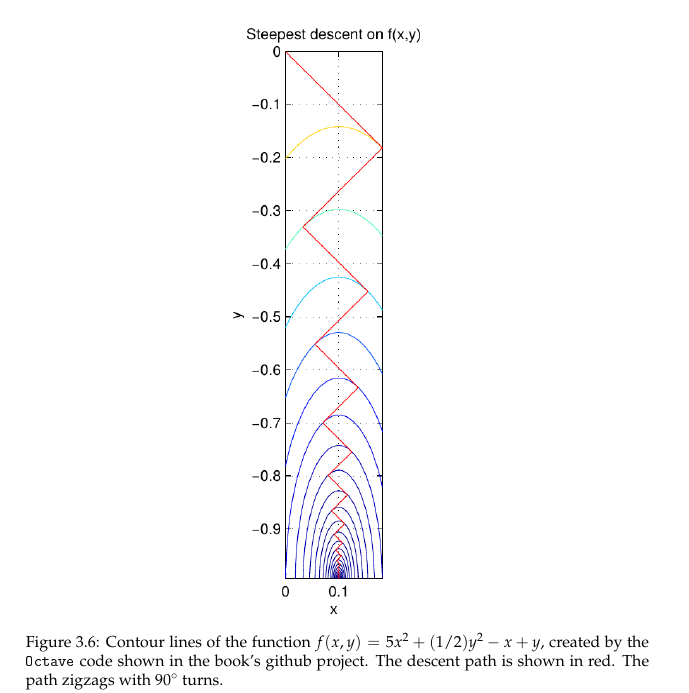


El SD produce mucho zig-zageo. Es optimo en el sentido de que el paso $\alpha$ te lleva a "mitad de la canada"

La pregunta es, no podemos **en un plano** llegar de una vez al minimo. Tres personas en 1952 pensaron en esto y originaron el metodo de en esta idea y generaron un algoritmo llamado **Conjugate Gradient** (CG). El apendice B de mis notas explica el metodo con detalle. En esta clase no desarrollamos tal apendice. El articulo original se puede bajar gratis (el link esta en las notas de clase). Cualitativamente queremos la direccion que en un plano nos lleve de un punto de la elipse al centro directamente de la elipse. Cualitativemente cual esta direccion?

Hestenes et. al., encontraron que tal direccion satisface la siguiente ecuacion.
Sea $u$ la direccion del vector uno, la siguiente direccion es la direccion $v$
y $u$ y $v$ satisfacen la siguiente ecuacion

$$ u^T A v = 0 \quad (1) $$.

Las direccion ese $u$, $v$ se llaman cojungadas y son "ortogonales" via $A$. Si $A$ es la identidad $\langle u, v \rangle =0$. La expresion (1) tambien se llama

$$ \langle u, v \rangle_A $$.
Una cosa bonita es el CG converge en a lo mas $n$ iteraciones en una matriz $A$ de $n \times n$. Y el error es cero. (excepto por el "numerical round off").

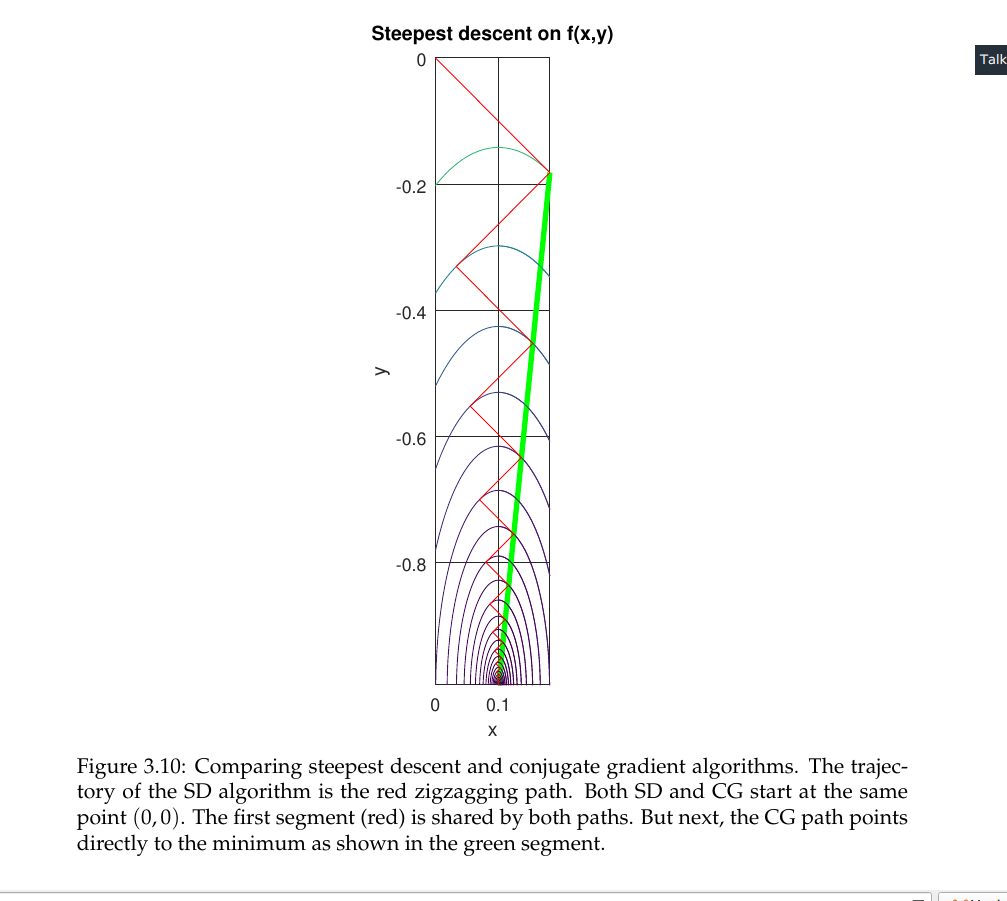

En la figura anterior el camino verde es CG.

Todo muy bonito, pero entonces (pregunta Juan) que se esta haciendo ahora. El CG resuelve el problema $A \theta = b$.
Pero no resuelve problemas no lineales, por ejemplo
Si el problema es lineal en el gradiente (o sea $J(\theta) = A \theta - b$ el mejor metodo es el CG. Pero la superficie no es cuadratica (paraboloide, o hiper-paraboloide) entonces CG no es viable. Ejemplo. 

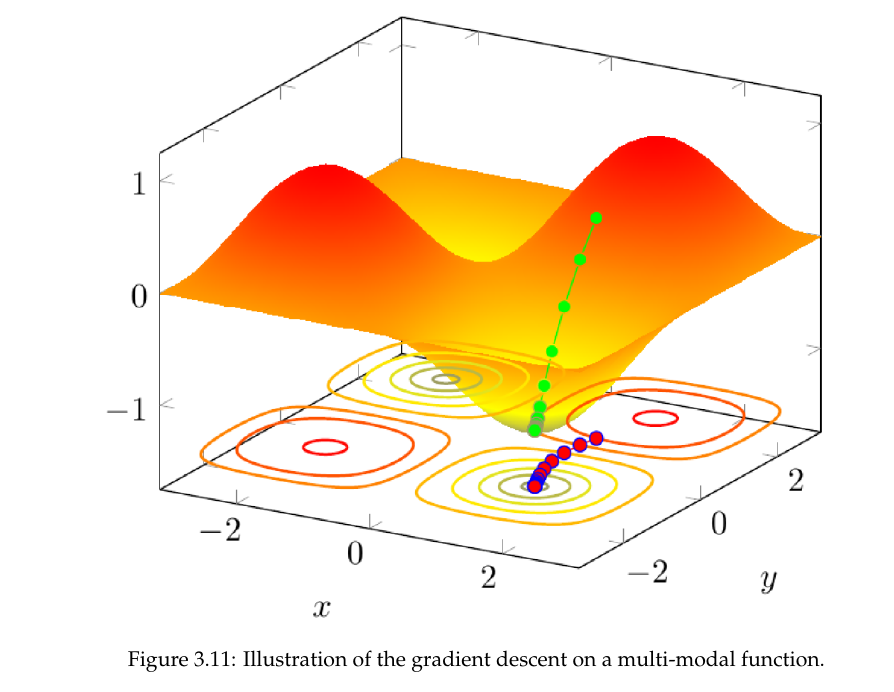

La formula de descenso $\theta_k = \theta_{k-1} - \alpha \nabla J(\theta_{k-1})$ siempre vale. Se inventaron nuevos metodos como el L-BFGS, dentro de una gama que se llama metodos de Newton y Quasi-Newton. Por ejemplo el:

[Gradiente Conjugado No lineal](https://en.wikipedia.org/wiki/Nonlinear_conjugate_gradient_method)



Esta por fuera de esta clase analizar el L-BFGS. 

Hay otros metodos de descenso como el SGD Stochastic Gradient Descent, que usa un sasmpleo aleatorio de muestras del gradiente para descender con la ecuacoin
$\theta_k = \theta_{k-1} - \alpha \nabla J(\theta_k)$ lo que pasa es que
$\nabla J$ no se calcula para todos los datos sino para algunos y se promedidan,
con esto se gana tiempo de proceso. Es efectivo y se usa mucho en ANN: Artificial Neural Networks. 

Por ultimo el **minibatch Gradient Desecend** usas paquetes de datos en vez de todos lados y sosbre los paquetes construye un promedio del graidente. No es tan exacto pero puede ahorrar tiempo de proceso. Si el paquete tiene el tamano de todos los dadtos se llama **batch** 

## Regresion multivariada
Piense en el problema del precio que le quiero poner a mi casa. Pensar que el precio solo depende el area es absurdo. Hay muchos mas parametros. Por ejemplo, el numero de habitaciones.

<a id='another_cell'></a>


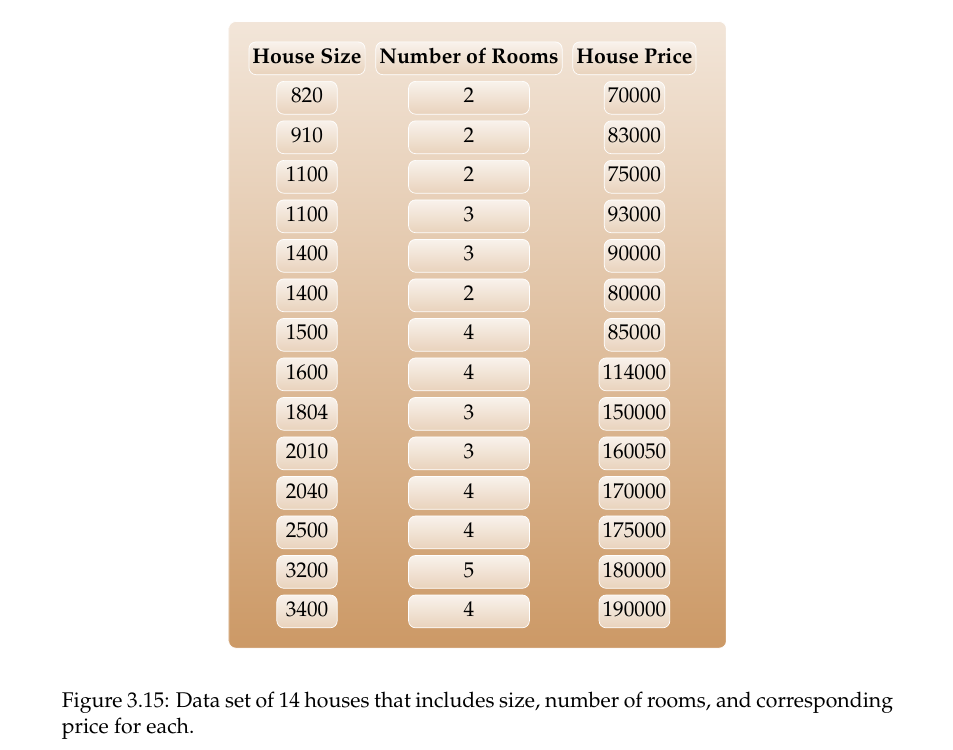

En este caso tenemos 2 "features" (atributos) que son area y numero de habitacioneses.

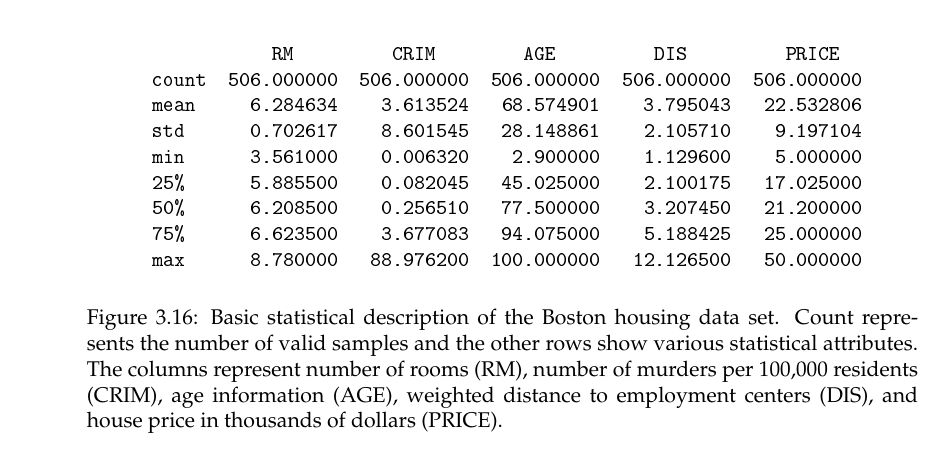

La tabla anterior es de una base de datos Boston Housing Data (finca raiz). Solo se muestran:

* RM: Numero de habitaciones
* CRIM: indice de criminalidad
* Age: Edad de la casa
* Dis: Distancia a centros de trabajo
El precio (Price) es la variable independiente $y$ que es la etiqueta (label).

En la base de datos real hay 13 "features". 

Volviendo a la tabla de tres columnas de arriba (la invente yo).
Podemos llevar el problema a un lenguaje matematico:

$$y_1 = \theta_0 + \theta_1 x_{11} + \theta_2 x_{12} $$
$$y_2 = \theta_0 + \theta_1 x_{21} + \theta_2 x_{22} $$
$$y_3 = \theta_0 + \theta_1 x_{31} + \theta_2 x_{32} $$
$$\vdots = \vdots $$
$$y_m = \theta_0 + \theta_1 x_{m1} + \theta_2 x_{n2} $$

En forma matricial tenemos $y = X \theta$ donde

\begin{eqnarray}
y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}
\quad , \quad \theta = \begin{pmatrix} \theta_0 \\ \theta_1 \end{pmatrix}
\quad , \quad X = \begin{pmatrix} 1 & x_{11} & x_{12} \\
1 & x_{21} & x_{22} \\
\vdots & \vdots & \vdots \\
1 & x_{m1} & x_{m2} \end{pmatrix}
\end{eqnarray}

El problema se puede resolver por minimos cuadrados como


$$ \theta = (X^T X)^{-1} X^t y $$
No importa el numero de columnas, el problema es el mismo.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
mu, sigma=0,1
N=5
Z = np.random.normal(mu, sigma, N)
phi=0.3
X=np.zeros(N)
X[0]=Z[0]

for t in range(1,N):
    X[t] = Z[t] + phi*X[t-1]
    
    

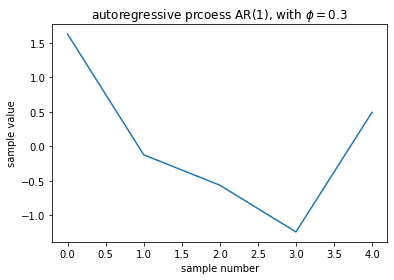

In [2]:
plt.xlabel("sample number")
plt.ylabel("sample value")
plt.title("autoregressive prcoess AR(1), with $\phi=0.3$")
plt.plot(X)
# plt.savefig('AR1recursive.pdf')
plt.show();

## Regression:
The same principle applires whether it is one or more variables. For example, we think that
$X_t, X_{t-1}, \cdots, , X_{t-k}$ are correlated. We can make a linear regression to fit $X_t$
versus $X_{t-1}, X_{t-2},  \cdots, X_{t-k}$.\


In [4]:
# let us build the variables $X_{t-1}, X_{t-2}, \cdots, X_{t-k+1}
n=X.size
k=4
Y=np.zeros( shape=(k,n), dtype='float')
Y[0]=X
for i in range(1,k):
    Y[i,:-i]=X[i:]

In [5]:
X

array([ 1.62434536, -0.1244528 , -0.56550759, -1.2426209 ,  0.49262136])

In [6]:
Y

array([[ 1.62434536, -0.1244528 , -0.56550759, -1.2426209 ,  0.49262136],
       [-0.1244528 , -0.56550759, -1.2426209 ,  0.49262136,  0.        ],
       [-0.56550759, -1.2426209 ,  0.49262136,  0.        ,  0.        ],
       [-1.2426209 ,  0.49262136,  0.        ,  0.        ,  0.        ]])

In [7]:
N=1000
Z = np.random.normal(mu, sigma, N)
phi=0.3
X=np.zeros(N)
X[0]=Z[0]

for t in range(1,N):
    X[t] = Z[t] + phi*X[t-1]

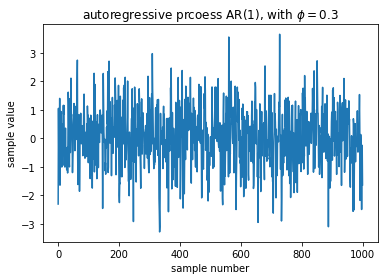

In [8]:
plt.xlabel("sample number")
plt.ylabel("sample value")
plt.title("autoregressive prcoess AR(1), with $\phi=0.3$")
plt.plot(X)
# plt.savefig('AR1recursive.pdf')
plt.show();

In [9]:
# let us build the variables $X_{t-1}, X_{t-2}, \cdots, X_{t-k+1}
n=X.size
k=4
Y=np.zeros( shape=(k,n), dtype='float')
Y[0]=X
for i in range(1,k):
    Y[i][:-i]=X[i:]

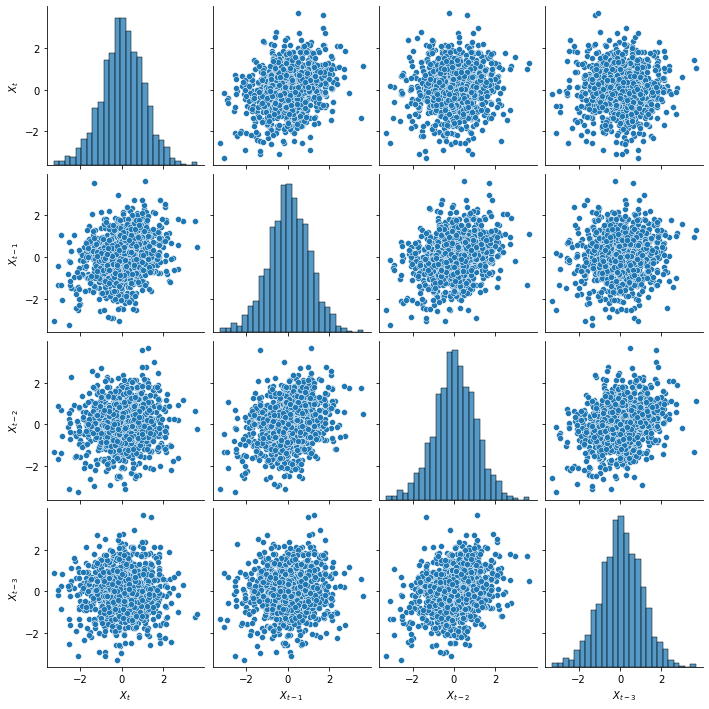

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# create dataframe using the Y data
data=np.transpose(Y)
df = pd.DataFrame(data)
X1="$X_t$"
X2="$X_{t-1}$"
X3="$X_{t-2}$"
X4="$X_{t-3}$"
df.columns=[X1, X2, X3, X4]
sns.pairplot(df);
# plt.savefig('multiScatter.pdf')
# could also pandas and try
# pd.plotting.scatter_matrix(df, alpha=0.4);

Removing linear dependencies
We show the effect of removing the correlation for lag k = 4. That is, the linear dependency of $X_t$
on $X_{t −1}, X_{t−2} , X_{t−3}$ . We plot the matrix scatter plot to see that Xt is highly correlated with X4

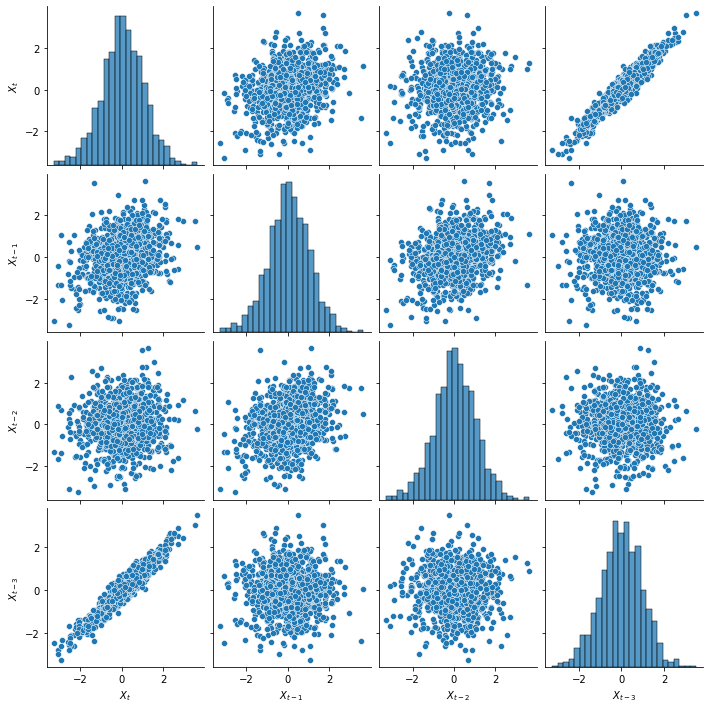

In [11]:
# column of ones in first colum of Xtm1
ones=np.ones( shape=(n,1), dtype='float')
# stack ones
Xmat = np.column_stack((ones, Y[1]))
for i in range (2, k-1):
# stack Y xolumns
    Xmat = np.column_stack((Xmat, Y[i]))
XT= Xmat.transpose()
XTX = XT.dot(Xmat)
XTXInv = np.linalg.inv(XTX)
b= np.matmul(Xmat.transpose(), Y[0])
theta=XTXInv.dot(b)
# at this point the multivariate regression is given b
# sum( theta[j]*Y[j] for j in range(1,k-1))
# compute the residuals
Y_t = X - theta[0] - sum( theta[j]*Y[j] for j in range(1,k-1))
Y[k-1]=Y_t

# create dataframe using the Y data
data=np.transpose(Y)
df = pd.DataFrame(data)
X1="$X_t$"
X2="$X_{t-1}$"
X3="$X_{t-2}$"
X4="$X_{t-3}$"
df.columns=[X1, X2, X3, X4]
sns.pairplot(df);


## Feature normalization (normalizacion de atributos).
Miremos otra vez la tabla de los precios (Figura 1  [Another Cell](#another_cell)
) de las casas como funcion del numero de habitaciones y el area. Vemos una gran disparidad entre los datos, los unos de orden uno y los otros de orden 3. Es como si cambiaramos las unidades de metros a milimetros. Esto genera problemas:

1. La convergencia se hace mas lenta si estamos metodos de gradiente (mucho zig-zageo en SD). Por las elipses se achatan.
2. La precision sufra, por que el numero de condicion $\kappa$ se hace grande por la disparidad entre $\sigma_1$ y $\sigma_n$. Pero si $\sigma_1 \gg \sigma_n$ entonces $\kappa \gg 1$ y esto no es bueno. Introduce inestabilidad y el error es mayor.
3. El concepto de distancia es mas claro cuando las dimensiones de los ejes son comparables. 

Como se arregla este problema? feature normalization.

Hay cuatro tecnicas que vamos a considerar para remover este sesgo.

1. Estandarizacion (standardization).  Se normalizan los datos para que cada columna de la matriz quede con media 0 y desviacion estandard $\sigma=1$.
Los unos no se tocan

Esto se hace con la siguiente equation:

$$ X_j \leftarrow  \frac{X_j - \mu_j}{\sigma_j}$$
donde

$$ \mu_j = \frac{\sum_{i=1}^m x_{ij}}{m}  \\
\sigma_j = \sqrt{ \frac{\sum_{i=1}^m (x_{ij} - \mu_j)^2}{m}} $$

2. Mean normalizacion (normalizacion con la media). En palabras: A cada columna le removemos su media y la dividimos por el rango (la diferencia entre maximo y minimo por columna)

$$ X_j :=   \frac{X_j - \mu_j}{\max_i \{ x_{ij} \} - \min_i \{ x_{ij} \}} \quad , \quad i=1,2, \cdots, m.$$

3. Min-Max scaling (escalar por min-max). Es casi el mismo que el anterior, solo que en vez dde restar la media se resta el minimo.

$$ X_j :=   \frac{X_j - \min_i \{ x_{ij} \}}{\max_i \{ x_{ij} \} - \min_i \{ x_{ij} \}} \quad , \quad i=1,2, \cdots, m.$$

4. Normalizacion norma 2: (vector normalization). Se usa la norma del 
vector. Es decir

$$ X_j :=  \frac{X_j}{\| X_j \| } $$

La pregunta que surge, es "profe: pero esto cambia el problema".
No es lo mismo resolver

$X \theta = y$ que  $X_n \theta_n = y$. Por que aun asi la normalizacion sirve.

Piense en lo siguiente. Para resoler $X \theta = y$. 
* Resuelva el problema $X_n \theta_n = y$.
* Guarde sus parametros de normalizacion $\mu, \sigma, \max, \min, \| \|$.
* Obtuvo $\theta_n$. Luego te dan nuevos datos $X'$. 
* A estos nuevos datos le aplicas los parametros de normalizacion obtenidos arriba. 
* con esto calculas la nueava hipotesis $h(\theta_n, X'_n)=X'_n \theta_n$.  Esta nueva hipotesis se compara con $y$. 




In [15]:
x=5
x = x-1
x

x=5
y=x-1
if x == y :
    print("x==y")
else:
    print("x no es lo mismo que y")

x no es lo mismo que y
